<a href="https://colab.research.google.com/github/dcshapiro/funWithShap/blob/master/shapOnImagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install shap

    100% |████████████████████████████████| 225kB 16.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/26/bd/912db1314f1cef0171d9b7f128dd01e8b8c92ed8d0062e632d
Successfully built shap


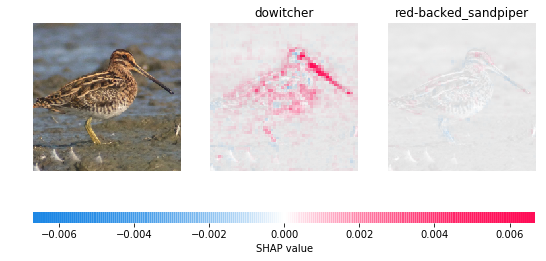

In [31]:
# copied from the shap examples shap/notebooks/deep_explainer but reduced input to one image instead of 2, for simplicity
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

In [33]:
# dimensions of first image
to_explain.shape

(1, 224, 224, 3)

In [5]:
!wget https://thephotostudio.com.au/wp-content/uploads/2017/10/demi-rose.jpg

--2019-04-14 14:43:23--  https://thephotostudio.com.au/wp-content/uploads/2017/10/demi-rose.jpg
Resolving thephotostudio.com.au (thephotostudio.com.au)... 104.25.254.25, 104.25.255.25, 2606:4700:20::6819:fe19, ...
Connecting to thephotostudio.com.au (thephotostudio.com.au)|104.25.254.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53695 (52K) [image/jpeg]
Saving to: ‘demi-rose.jpg’

demi-rose.jpg       100%[===================>]  52.44K  --.-KB/s    in 0.005s  

2019-04-14 14:43:23 (11.0 MB/s) - ‘demi-rose.jpg’ saved [53695/53695]



336 224 3
224 224 3


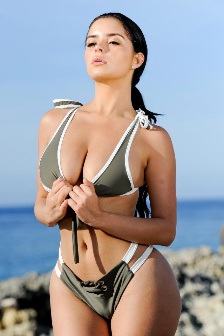

In [6]:
%matplotlib inline

#with code from https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash/52061135
#with code from https://medium.com/@manivannan_data/resize-image-using-opencv-python-d2cdbbc480f0
import cv2
import matplotlib.pyplot as plt
from google.colab import files

filename = 'demi-rose.jpg'
W = 224.
oriimg = cv2.imread(filename)
height, width, depth = oriimg.shape
imgScale = W/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
crop_img = newimg[:224, :224,:]
cv2.waitKey(0)
cv2.imwrite("resizeimg.jpg",newimg)
cv2.waitKey(0)
cv2.imwrite("cropimg.jpg",crop_img)
height, width, depth = newimg.shape
print(height, width, depth)
height, width, depth = crop_img.shape
print(height, width, depth)
#files.download('resizeimg.jpg')

from IPython.display import Image
Image(filename='resizeimg.jpg') 

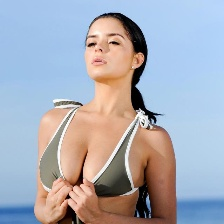

In [67]:
from IPython.display import Image
Image(filename='cropimg.jpg') 

In [74]:
to_explain = crop_img[np.newaxis,:,:,:].astype(float)
print(to_explain.shape)

(1, 224, 224, 3)


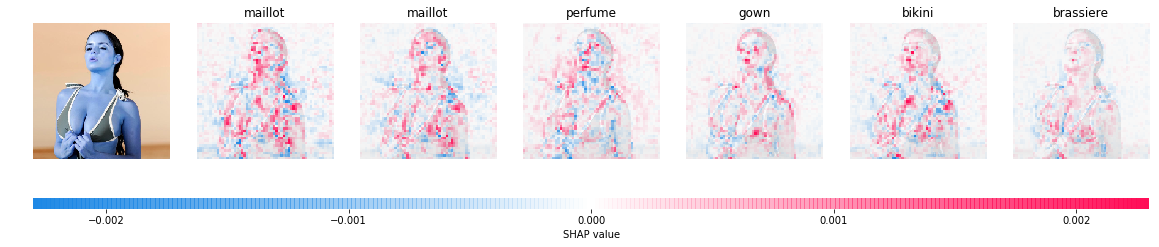

In [65]:
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=6)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)


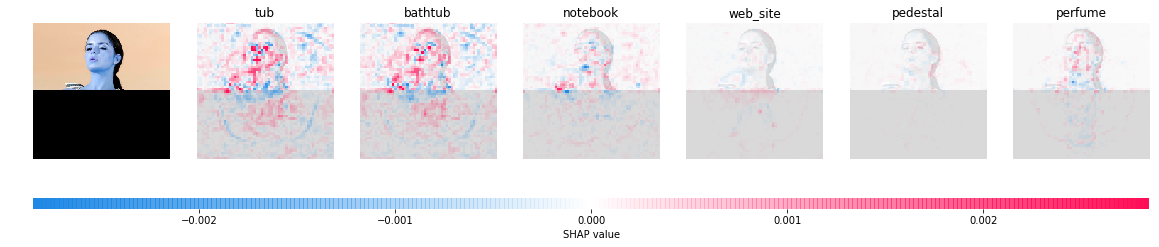

In [72]:
import copy

masked = copy.deepcopy(to_explain)
for i in range(112,224):
  for j in range(224):
    for c in range(3):
      masked[0][i][j][c]=0.

shap_values,indexes = e.shap_values(map2layer(masked, 7), ranked_outputs=6)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, masked, index_names)

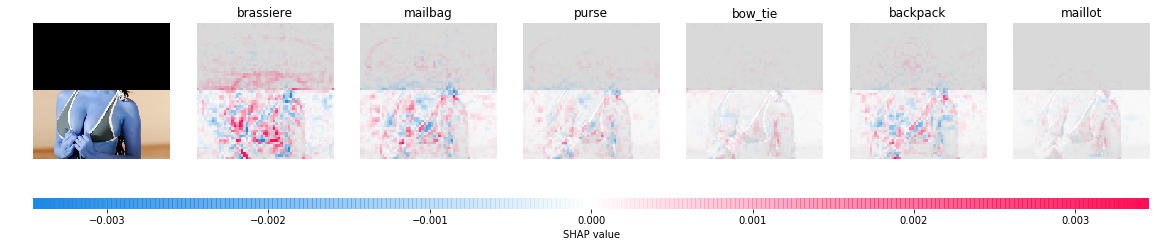

In [73]:
import copy

masked = copy.deepcopy(to_explain)
for i in range(0,112):
  for j in range(224):
    for c in range(3):
      masked[0][i][j][c]=0.

shap_values,indexes = e.shap_values(map2layer(masked, 7), ranked_outputs=6)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, masked, index_names)